In [1]:
# notebook that generates figure 1 in the extended abstract

In [2]:
import numpy as np
import fooof
import matplotlib.pyplot as plt
import CanonParam.parameterize_spectra as bandparams


# Load in the Data

In [3]:
example_spectra = np.load('../data/example_comparison_spectra.npz')
sample_freqs = example_spectra['sample_freqs']
sample_psd = example_spectra['sample_psd']
channels = example_spectra['channels']
channel = 'O2'
chdx = np.where(channels == channel)[0][0]

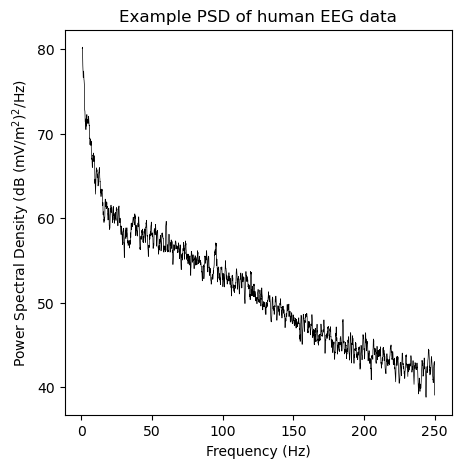

In [4]:
plt.figure(figsize=(5, 5))
plt.plot(sample_freqs, 10*np.log10(1e6*sample_psd[chdx, :]), color='black', linewidth=.5)
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power Spectral Density (dB (mV/m$^2$)$^2$/Hz)');
plt.title('Example PSD of human EEG data');
plt.show()


(2495,) (19, 2495)


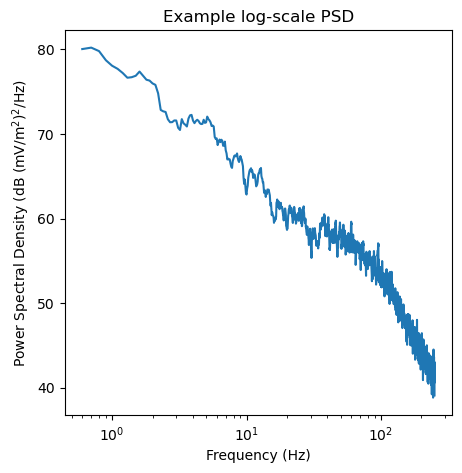

In [5]:
plt.figure(figsize=(5, 5))
sample_psd = sample_psd[:, sample_freqs > 0.5]
sample_freqs = sample_freqs[sample_freqs > 0.5]
print(sample_freqs.shape, sample_psd.shape)
plt.plot(sample_freqs, 10*np.log10(1e6*sample_psd)[chdx])
plt.title('Example log-scale PSD')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB (mV/m$^2$)$^2$/Hz)');
plt.show()

# theirs vs ours

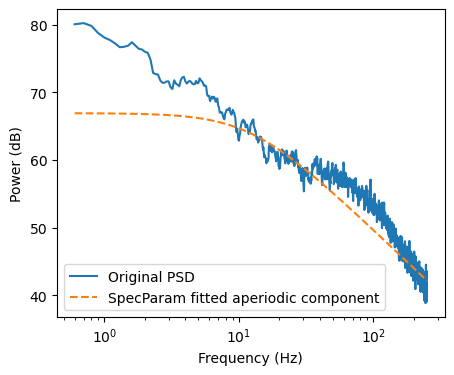

In [6]:
max_n_peaks=7
fm = fooof.FOOOF(peak_width_limits=(2.0, 100.0), max_n_peaks=max_n_peaks, min_peak_height=0.2, peak_threshold=2.0, aperiodic_mode='knee', verbose=True)
# freqs0, power0 = interpolate_notches(notches, notch_width, freqs, open_power[0,0,:])
fm.fit(freqs=sample_freqs, power_spectrum=sample_psd[chdx,:]) # taking forever when unconstrained.
plt.figure(figsize=(5, 4))
plt.plot(sample_freqs, 10*np.log10(1e6*sample_psd[chdx,:]), label='Original PSD')
# plt.plot(sample_freqs, 10*(fm._ap_fit+fm._peak_fit)+60, label='SpecParam Fitted PSD (no band priors)')
plt.plot(sample_freqs, 10*fm._ap_fit+60, label='SpecParam fitted aperiodic component', linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.xscale('log')
# plt.title('Example PSD fitted with existing method: SpecParam')
plt.show()

array([ 0.68984131,  0.68935548,  0.68880427, ..., -1.78303882,
       -1.78336632, -1.78369368])

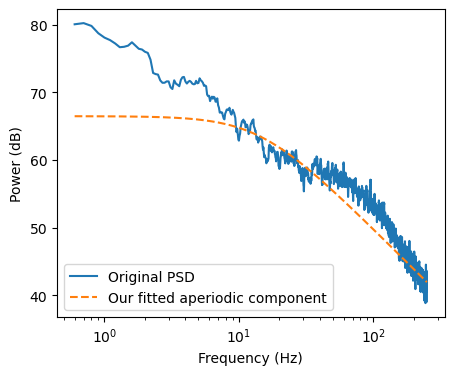

In [7]:
import importlib
importlib.reload(bandparams)
our_fitted_ps = bandparams.extract_param_spectra(sample_freqs, sample_psd[chdx,:])
our_fitted_model = our_fitted_ps.modeled_spectrum_
plt.figure(figsize=(5, 4))
plt.plot(sample_freqs, 10*np.log10(1e6*sample_psd[chdx,:]), label='Original PSD')
# plt.plot(sample_freqs, 10*our_fitted_model+60, label='Our Fitted PSD (with band priors)')
plt.plot(sample_freqs, 10*our_fitted_ps._ap_fit+60, label='Our fitted aperiodic component', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.xscale('log')
# plt.title('Example PSD fitted with our method: CanonParam')
plt.legend(loc='lower left')
plt.show()  

# now let's actually compare these fits

Text(0.5, 0, 'Frequency (Hz)')

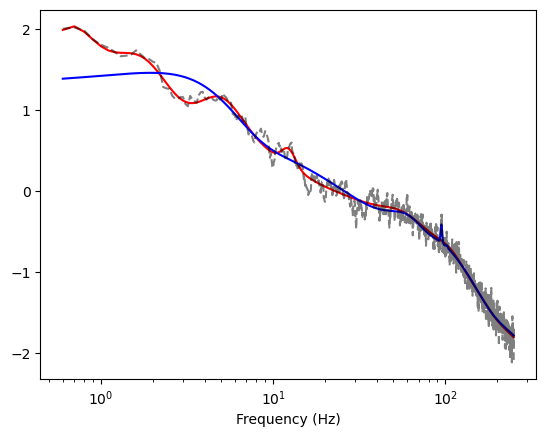

In [8]:
our_model = our_fitted_ps.modeled_spectrum_
their_model = fm._ap_fit+fm._peak_fit
original_spectrum = np.log10(sample_psd[chdx,:])
# assert np.all(original_spectrum == our_fitted_ps.power_spectrum)
plt.plot(sample_freqs, our_model, label='Our Fitted PSD (with band priors)', color='red')
plt.plot(sample_freqs, their_model, label='SpecParam Fitted PSD (no band priors)', color='blue')
plt.plot(sample_freqs, original_spectrum, label='Original', color='black', linestyle='--', alpha=0.5)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')

In [9]:
fm.get_params('peak_params')

array([[  2.1       ,   0.78371311,   6.25155612],
       [ 58.28147832,   0.333051  ,  25.65665492],
       [ 88.87555658,   0.34726648,  42.70193507],
       [ 95.07440545,   0.5844234 ,   2.        ],
       [102.23031931,   0.38539318,   2.        ],
       [122.79985448,   0.30457391,  64.59859074]])

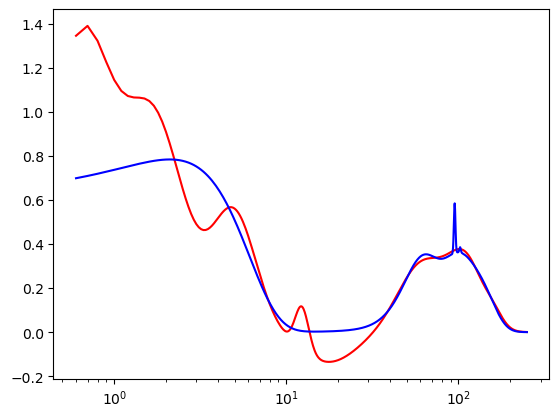

In [10]:
our_peaks= our_fitted_ps._peak_fit
our_ap = our_fitted_ps._ap_fit
their_peaks = fm._peak_fit
their_ap = fm._ap_fit
original_spectrum = np.log10(sample_psd[chdx,:])

# assert np.all(original_spectrum == our_fitted_ps.power_spectrum)
plt.plot(sample_freqs, our_peaks, label='Our Peaks', color='red')
plt.plot(sample_freqs, their_peaks, label='Their Peaks', color='blue')
# plt.plot(sample_freqs, our_ap, label='Our Aperiodic', linestyle='--', color='red')
# plt.plot(sample_freqs, their_ap, label='Their Aperiodic', linestyle='--', color='blue')
plt.xscale('log')

# demonstrating method

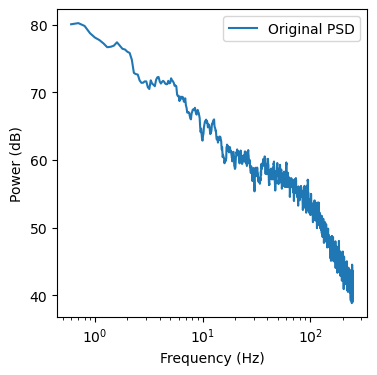

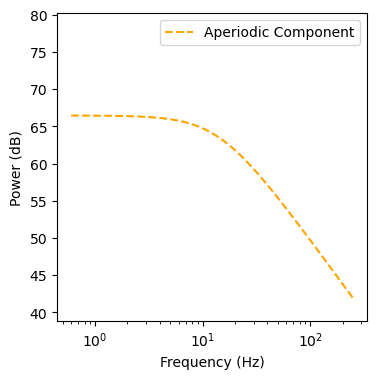

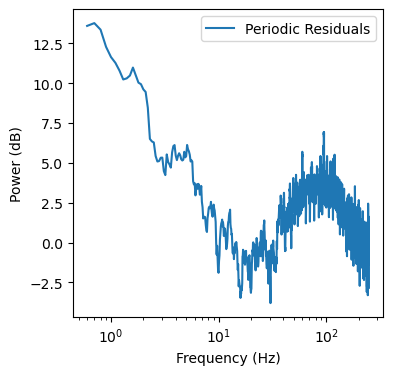

In [11]:
our_peaks= our_fitted_ps._peak_fit
our_ap = our_fitted_ps._ap_fit
their_peaks = fm._peak_fit
their_ap = fm._ap_fit
original_spectrum = np.log10(sample_psd[chdx,:])
their_resid = 10*(original_spectrum - their_ap)
plt.figure(figsize=(4, 4))
plt.plot(sample_freqs, 10*(original_spectrum)+60, label='Original PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.legend(loc='upper right')
plt.xscale('log')


plt.figure(figsize=(4, 4))
plt.plot(sample_freqs, 10*(our_ap)+60, label='Aperiodic Component', linestyle='--', color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.legend(loc='upper right')
plt.ylim(np.min(10*(original_spectrum))+60, np.max(10*(original_spectrum))+60)
plt.xscale('log')

plt.figure(figsize=(4, 4))
plt.plot(sample_freqs, 10*(original_spectrum - our_ap), label='Periodic Residuals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.legend(loc='upper right')
plt.xscale('log')

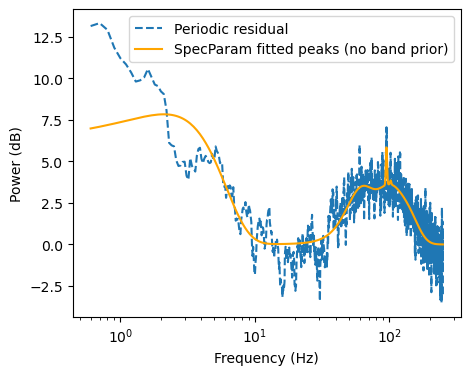

In [12]:
our_peaks= our_fitted_ps._peak_fit
our_ap = our_fitted_ps._ap_fit
their_peaks = fm._peak_fit
their_ap = fm._ap_fit
original_spectrum = np.log10(sample_psd[chdx,:])
their_resid = 10*(original_spectrum - their_ap)
plt.figure(figsize=(5, 4))
# assert np.all(original_spectrum == our_fitted_ps.power_spectrum)
# plt.plot(sample_freqs, our_peaks, label='Our Peaks', color='red')

# plt.plot(sample_freqs, our_ap, label='Our Aperiodic', linestyle='--', color='red')
plt.plot(sample_freqs,  their_resid, label='Periodic residual', linestyle='--')
plt.plot(sample_freqs, 10*(their_peaks), label='SpecParam fitted peaks (no band prior)', color='orange')
# plt.plot(sample_freqs, 10*(original_spectrum+6), label='Original', color='black', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.legend(loc='upper right')
plt.xscale('log')

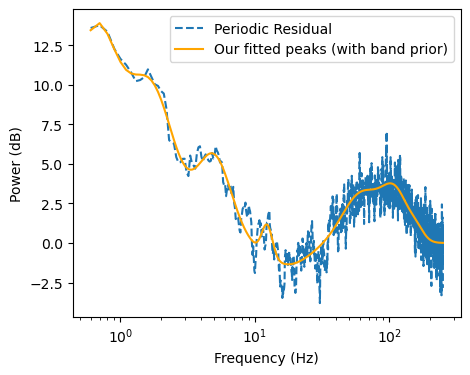

In [13]:
our_peaks= our_fitted_ps._peak_fit
our_ap = our_fitted_ps._ap_fit
their_peaks = fm._peak_fit
their_ap = fm._ap_fit
original_spectrum = np.log10(sample_psd[chdx,:])
their_resid = 10*(original_spectrum - their_ap)
our_resid = 10*(original_spectrum - our_ap)
plt.figure(figsize=(5, 4))
# assert np.all(original_spectrum == our_fitted_ps.power_spectrum)
plt.plot(sample_freqs,  our_resid, label='Periodic Residual', linestyle='--')
plt.plot(sample_freqs, 10*our_peaks, label='Our fitted peaks (with band prior)', color='orange')
# plt.plot(sample_freqs, 10*(their_peaks), label='SpecParam Peaks', color='orange')
# plt.plot(sample_freqs, our_ap, label='Our Aperiodic', linestyle='--', color='red')

# plt.plot(sample_freqs, 10*(original_spectrum+6), label='Original', color='black', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.legend(loc='upper right')
plt.xscale('log')

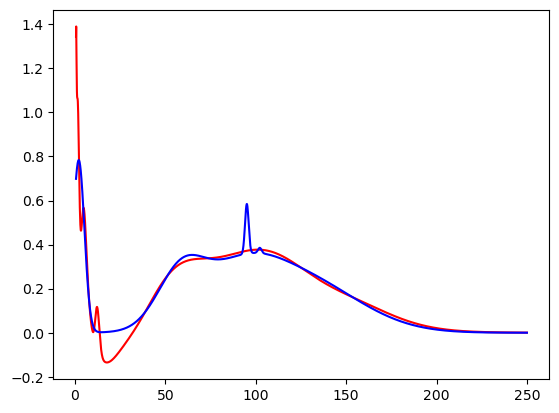

In [14]:
our_peaks= our_fitted_ps._peak_fit
our_ap = our_fitted_ps._ap_fit
their_peaks = fm._peak_fit
their_ap = fm._ap_fit
original_spectrum = np.log10(sample_psd[chdx,:])

# assert np.all(original_spectrum == our_fitted_ps.power_spectrum)
plt.plot(sample_freqs, our_peaks, label='Our Peaks', color='red')
plt.plot(sample_freqs, their_peaks, label='Their Peaks', color='blue')
# plt.plot(sample_freqs, our_ap, label='Our Aperiodic', linestyle='--', color='red')
# plt.plot(sample_freqs, their_ap, label='Their Aperiodic', linestyle='--', color='blue')
# plt.xscale('log')

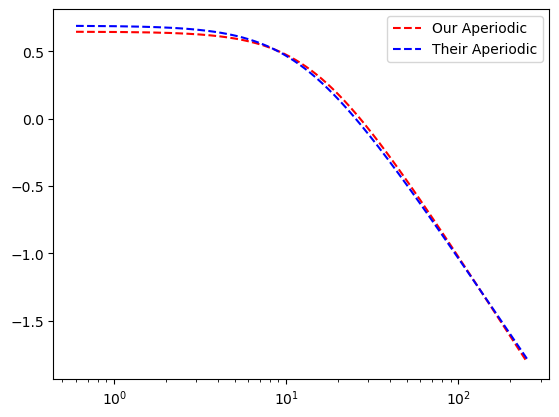

In [15]:
plt.plot(sample_freqs, our_ap, label='Our Aperiodic', linestyle='--', color='red')
plt.plot(sample_freqs, their_ap, label='Their Aperiodic', linestyle='--', color='blue')
plt.legend(loc='upper right')
plt.xscale('log')

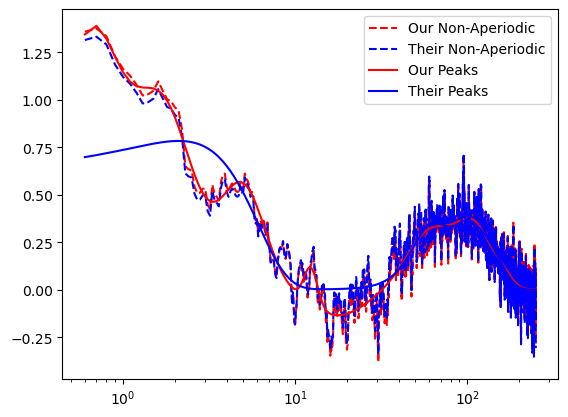

In [16]:
our_non_ap = original_spectrum - our_ap
their_non_ap = original_spectrum - their_ap
plt.plot(sample_freqs, our_non_ap, label='Our Non-Aperiodic', linestyle='--', color='red')
plt.plot(sample_freqs, their_non_ap, label='Their Non-Aperiodic', linestyle='--', color='blue')
plt.plot(sample_freqs, our_peaks, label='Our Peaks', color='red')
plt.plot(sample_freqs, their_peaks, label='Their Peaks', color='blue')
plt.legend(loc='upper right')
plt.xscale('log')

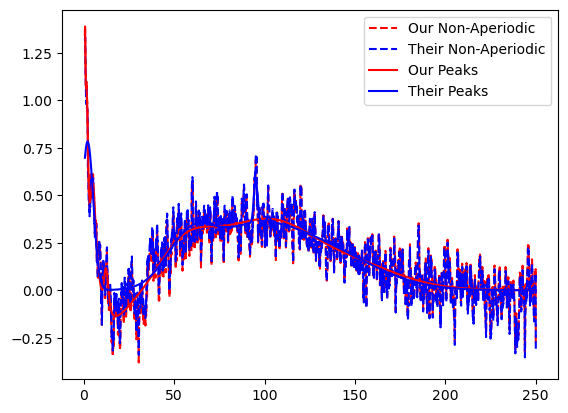

In [17]:
our_non_ap = original_spectrum - our_ap
their_non_ap = original_spectrum - their_ap
plt.plot(sample_freqs, our_non_ap, label='Our Non-Aperiodic', linestyle='--', color='red')
plt.plot(sample_freqs, their_non_ap, label='Their Non-Aperiodic', linestyle='--', color='blue')
plt.plot(sample_freqs, our_peaks, label='Our Peaks', color='red')
plt.plot(sample_freqs, their_peaks, label='Their Peaks', color='blue')
plt.legend(loc='upper right')
# plt.xscale('log')

# overall r-squared

In [18]:
our_r_squared = our_fitted_ps.r_squared_
their_r_squared = fm.r_squared_
our_computed_r_squared = np.corrcoef(original_spectrum, our_model)[0,1]**2
their_computed_r_squared = np.corrcoef(original_spectrum, their_model)[0,1]**2
print(our_r_squared, their_r_squared, our_computed_r_squared, their_computed_r_squared)

0.9839461639993445 0.9805933687591873 0.9837469087221066 0.9805933687591873


In [19]:
ap_r_squared = np.corrcoef(original_spectrum, our_ap)[0,1]**2
non_ap_r_squared = np.corrcoef(our_non_ap, our_peaks)[0,1]**2
their_ap_r_squared = np.corrcoef(original_spectrum, their_ap)[0,1]**2
their_non_ap_r_squared = np.corrcoef(their_non_ap, their_peaks)[0,1]**2
print(f"R^2 for aperiodic component: \n\t us {ap_r_squared}, \t them {their_ap_r_squared}")
print(f"R^2 for non-aperiodic component: \n\t us {non_ap_r_squared}, \t them {their_non_ap_r_squared}")


R^2 for aperiodic component: 
	 us 0.9277546371257854, 	 them 0.928210260259454
R^2 for non-aperiodic component: 
	 us 0.7845054617792595, 	 them 0.7526074267875917


# overall metrics: RMSE, R2, MAPE

In [20]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for overall fit
our_rmse = np.sqrt(mean_squared_error(original_spectrum, our_model))
their_rmse = np.sqrt(mean_squared_error(original_spectrum, their_model))

# Calculate RMSE for aperiodic fit
our_ap_rmse = np.sqrt(mean_squared_error(original_spectrum, our_ap))
their_ap_rmse = np.sqrt(mean_squared_error(original_spectrum, their_ap))

# Calculate RMSE for non-aperiodic fit
our_non_ap_rmse = np.sqrt(mean_squared_error(our_non_ap, our_peaks))
their_non_ap_rmse = np.sqrt(mean_squared_error(their_non_ap, their_peaks))

print(f"Overall RMSE: \t us {our_rmse}, \t them {their_rmse}")
print(f"RMSE for aperiodic component: \n\t us {our_ap_rmse}, \t them {their_ap_rmse}")
print(f"RMSE for non-aperiodic component: \n\t us {our_non_ap_rmse}, \t them {their_non_ap_rmse}")

Overall RMSE: 	 us 0.0924832588408427, 	 them 0.10109277154983769
RMSE for aperiodic component: 
	 us 0.2604223537978882, 	 them 0.2646716351218157
RMSE for non-aperiodic component: 
	 us 0.0924832588408427, 	 them 0.10109277154983769


In [21]:
from sklearn.metrics import r2_score

# Calculate R^2 for overall fit
our_r2 = r2_score(original_spectrum, our_model)
their_r2 = r2_score(original_spectrum, their_model)

# Calculate R^2 for aperiodic fit
our_ap_r2 = r2_score(original_spectrum, our_ap)
their_ap_r2 = r2_score(original_spectrum, their_ap)

# Calculate R^2 for non-aperiodic fit
our_non_ap_r2 = r2_score(our_non_ap, our_peaks)
their_non_ap_r2 = r2_score(their_non_ap, their_peaks)

print(f"Overall R^2: \n\t us {our_r2}, \t them {their_r2}")
print(f"R^2 for aperiodic component: \n\t us {our_ap_r2}, \t them {their_ap_r2}")
print(f"R^2 for non-aperiodic component: \n\t us {our_non_ap_r2}, \t them {their_non_ap_r2}")

Overall R^2: 
	 us 0.9837375083046122, 	 them 0.9805687363208035
R^2 for aperiodic component: 
	 us 0.8710511841374462, 	 them 0.8668087669873562
R^2 for non-aperiodic component: 
	 us 0.7843365374079053, 	 them 0.7489715534569508


In [22]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for overall fit
our_mape = mean_absolute_percentage_error(original_spectrum, our_model)
their_mape = mean_absolute_percentage_error(original_spectrum, their_model)

# Calculate MAPE for aperiodic fit
our_ap_mape = mean_absolute_percentage_error(original_spectrum, our_ap)
their_ap_mape = mean_absolute_percentage_error(original_spectrum, their_ap)

# Calculate MAPE for non-aperiodic fit
our_non_ap_mape = mean_absolute_percentage_error(our_non_ap, our_peaks)
their_non_ap_mape = mean_absolute_percentage_error(their_non_ap, their_peaks)

print(f"Overall MAPE: \t us {our_mape}, \t them {their_mape}")
print(f"MAPE for aperiodic component: \n\t us {our_ap_mape}, \t them {their_ap_mape}")
print(f"MAPE for non-aperiodic component: \n\t us {our_non_ap_mape}, \t them {their_non_ap_mape}")

Overall MAPE: 	 us 418.33242805325676, 	 them 488.05589889384447
MAPE for aperiodic component: 
	 us 615.5581485226044, 	 them 713.579625012028
MAPE for non-aperiodic component: 
	 us 139.83298978538917, 	 them 106.5677097577594


# let's try just looking at the low frequency bands

In [23]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for overall fit

max_freqs = [1.5, 4, 8, 12.5, 30, 70, 150, 250]
our_error_storage = np.zeros((len(max_freqs), 3*3))
their_error_storage = np.zeros((len(max_freqs), 3*3))
for max_freq in max_freqs:
    print(f"MAX FREQ: {max_freq}")
    good_inds = sample_freqs < max_freq
    our_rmse = np.sqrt(mean_squared_error(original_spectrum[good_inds], our_model[good_inds]))
    their_rmse = np.sqrt(mean_squared_error(original_spectrum[good_inds], their_model[good_inds]))

    # Calculate RMSE for aperiodic fit
    our_ap_rmse = np.sqrt(mean_squared_error(original_spectrum[good_inds], our_ap[good_inds]))
    their_ap_rmse = np.sqrt(mean_squared_error(original_spectrum[good_inds], their_ap[good_inds]))

    # Calculate RMSE for non-aperiodic fit
    our_non_ap_rmse = np.sqrt(mean_squared_error(our_non_ap[good_inds], our_peaks[good_inds]))
    their_non_ap_rmse = np.sqrt(mean_squared_error(their_non_ap[good_inds], their_peaks[good_inds]))

    print(f"\tOverall RMSE: \n\t us {our_rmse}, \t them {their_rmse}")
    print(f"\tRMSE for aperiodic component: \n\t us {our_ap_rmse}, \t them {their_ap_rmse}")
    print(f"\tRMSE for non-aperiodic component: \n\t us {our_non_ap_rmse}, \t them {their_non_ap_rmse}")


    # Calculate R^2 for overall fit
    our_r2 = r2_score(original_spectrum[good_inds], our_model[good_inds])
    their_r2 = r2_score(original_spectrum[good_inds], their_model[good_inds])

    # Calculate R^2 for aperiodic fit
    our_ap_r2 = r2_score(original_spectrum[good_inds], our_ap[good_inds])
    their_ap_r2 = r2_score(original_spectrum[good_inds], their_ap[good_inds])

    # Calculate R^2 for non-aperiodic fit
    our_non_ap_r2 = r2_score(our_non_ap[good_inds], our_peaks[good_inds])
    their_non_ap_r2 = r2_score(their_non_ap[good_inds], their_peaks[good_inds])

    print(f"\tOverall R^2: \n\t us {our_r2}, \t them {their_r2}")
    print(f"\tR^2 for aperiodic component: \n\t us {our_ap_r2}, \t them {their_ap_r2}")
    print(f"\tR^2 for non-aperiodic component: \n\t us {our_non_ap_r2}, \t them {their_non_ap_r2}")


    # Calculate MAPE for overall fit
    our_mape = mean_absolute_percentage_error(original_spectrum[good_inds], our_model[good_inds])
    their_mape = mean_absolute_percentage_error(original_spectrum[good_inds], their_model[good_inds])

    # Calculate MAPE for aperiodic fit
    our_ap_mape = mean_absolute_percentage_error(original_spectrum[good_inds], our_ap[good_inds])
    their_ap_mape = mean_absolute_percentage_error(original_spectrum[good_inds], their_ap[good_inds])

    # Calculate MAPE for non-aperiodic fit
    our_non_ap_mape = mean_absolute_percentage_error(our_non_ap[good_inds], our_peaks[good_inds])
    their_non_ap_mape = mean_absolute_percentage_error(their_non_ap[good_inds], their_peaks[good_inds])

    print(f"\tOverall MAPE: \t us {our_mape}, \t them {their_mape}")
    print(f"\tMAPE for aperiodic component: \n\t us {our_ap_mape}, \t them {their_ap_mape}")
    print(f"\tMAPE for non-aperiodic component: \n\t us {our_non_ap_mape}, \t them {their_non_ap_mape}")

    our_error_storage[max_freqs.index(max_freq), :] = [our_rmse, our_ap_rmse, our_non_ap_rmse, our_r2, our_ap_r2, our_non_ap_r2, our_mape, our_ap_mape, our_non_ap_mape]
    their_error_storage[max_freqs.index(max_freq), :] = [their_rmse, their_ap_rmse, their_non_ap_rmse, their_r2, their_ap_r2, their_non_ap_r2, their_mape, their_ap_mape, their_non_ap_mape]


import pandas as pd

our_error_df = pd.DataFrame(our_error_storage, columns=['Overall RMSE', 'RMSE AP', 'RMSE Non-AP', 'Overall R^2', 'R^2 AP', 'R^2 Non-AP', 'Overall MAPE', 'MAPE AP', 'MAPE Non-AP'], index=max_freqs)
their_error_df = pd.DataFrame(their_error_storage, columns=['Overall RMSE', 'RMSE AP', 'RMSE Non-AP', 'Overall R^2', 'R^2 AP', 'R^2 Non-AP', 'Overall MAPE', 'MAPE AP', 'MAPE Non-AP'], index=max_freqs)

MAX FREQ: 1.5
	Overall RMSE: 
	 us 0.02345052452408359, 	 them 0.4409020375192622
	RMSE for aperiodic component: 
	 us 1.1983835010341395, 	 them 1.1557143805290147
	RMSE for non-aperiodic component: 
	 us 0.02345052452408358, 	 them 0.44090203751926227
	Overall R^2: 
	 us 0.968916689635728, 	 them -9.987688891578523
	R^2 for aperiodic component: 
	 us -80.17340894226882, 	 them -74.4958670111858
	R^2 for non-aperiodic component: 
	 us 0.968398394888938, 	 them -10.28687142853094
	Overall MAPE: 	 us 1.1088679035346671, 	 them 22.063652452226073
	MAPE for aperiodic component: 
	 us 64.71171171292471, 	 them 62.36709074521075
	MAPE for non-aperiodic component: 
	 us 1.7474961392621298, 	 them 34.99436872103631
MAX FREQ: 4
	Overall RMSE: 
	 us 0.05149342330937902, 	 them 0.297745547480705
	RMSE for aperiodic component: 
	 us 0.8728947286392984, 	 them 0.8362523481650038
	RMSE for non-aperiodic component: 
	 us 0.05149342330937904, 	 them 0.29774554748070503
	Overall R^2: 
	 us 0.972142804

In [24]:
our_error_df

,Overall RMSE,RMSE AP,RMSE Non-AP,Overall R^2,R^2 AP,R^2 Non-AP,Overall MAPE,MAPE AP,MAPE Non-AP
1.5,0.023451,1.198384,0.023451,0.968917,-80.173409,0.968398,1.108868,64.711712,1.747496
4.0,0.051493,0.872895,0.051493,0.972143,-7.004931,0.970596,3.160975,54.531907,6.300286
8.0,0.050109,0.666976,0.050109,0.979553,-2.622535,0.975529,3.908299,45.612248,12.641684
12.5,0.077217,0.532996,0.077217,0.966459,-0.598093,0.953269,9.213559,36.467583,61.657062
30.0,0.085378,0.354768,0.085378,0.973325,0.539414,0.935706,391.907748,294.623291,475.147293
70.0,0.094919,0.303751,0.094919,0.961097,0.601605,0.862439,1485.079317,2145.103442,239.342529
150.0,0.090157,0.321637,0.090157,0.973213,0.659080,0.807192,695.412033,1023.554123,124.447752
250.0,0.092326,0.260412,0.092326,0.983781,0.870963,0.784711,418.494705,615.799518,139.848875


0 Overall RMSE (2, 3)
0 RMSE AP (2, 3)
0 RMSE Non-AP (2, 3)
1 Overall R^2 (2, 3)
1 R^2 AP (2, 3)
1 R^2 Non-AP (2, 3)


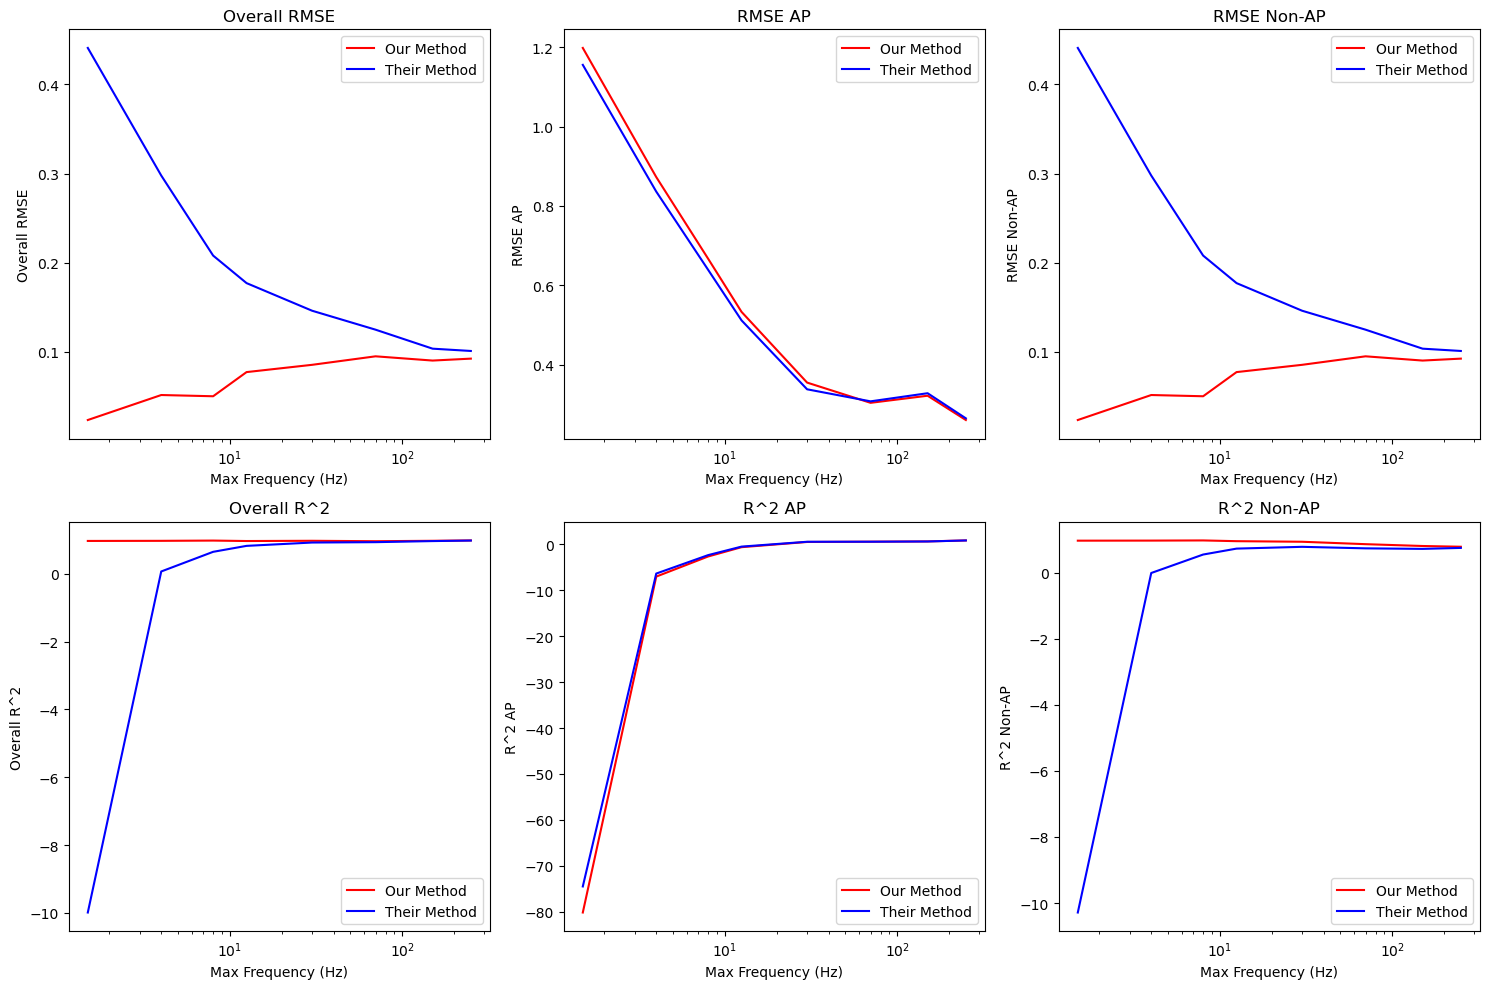

In [25]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for cdx, col in enumerate(our_error_df.columns):
    rowdx = cdx // 3
    coldx = cdx % 3
    if cdx > 5:
        break
    print(rowdx, col, axs.shape)
    axs[rowdx, coldx].plot(our_error_df.index, our_error_df[col], label='Our Method', color='red')
    axs[rowdx, coldx].plot(their_error_df.index, their_error_df[col], label='Their Method', color='blue')
    axs[rowdx, coldx].set_title(col)
    axs[rowdx, coldx].set_xlabel('Max Frequency (Hz)')
    axs[rowdx, coldx].set_ylabel(col)
    axs[rowdx, coldx].legend()
    axs[rowdx, coldx].set_xscale('log')
plt.tight_layout()


In [26]:
axs[0]

array([<Axes: title={'center': 'Overall RMSE'}, xlabel='Max Frequency (Hz)', ylabel='Overall RMSE'>,
       <Axes: title={'center': 'RMSE AP'}, xlabel='Max Frequency (Hz)', ylabel='RMSE AP'>,
       <Axes: title={'center': 'RMSE Non-AP'}, xlabel='Max Frequency (Hz)', ylabel='RMSE Non-AP'>],
      dtype=object)